### Feature Engineering with Play Store data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Data cleaning

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
## Summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### Insights and observation
data set has some missing values 

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
df['Reviews'].str.isnumeric().sum()

10840

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy.drop(df_copy.index[10472])

In [14]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
## Convert Reviews Datatype to int
df_copy['Reviews']= df_copy['Reviews'].astype(int)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_copy['Size'].isnull().sum()

0

In [19]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [20]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [22]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [23]:
df_copy['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [25]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [26]:
chars_to_remove= ['+',',','$']
cols_to_clean=['Installs','Price']
for items in chars_to_remove:
  for cols in cols_to_clean:
    df_copy[cols]=df_copy[cols].str.replace(items,'')

In [27]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [28]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [29]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [ ]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [32]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Last_Upd_Day']=df_copy['Last Updated'].dt.day
df_copy['Last_Upd_Month']=df_copy['Last Updated'].dt.month
df_copy['Last_Upd_Year']=df_copy['Last Updated'].dt.year

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Last_Upd_Day    10840 non-null  int32         
 14  Last_Upd_Month  10840 non-null  int32         
 15  Last_Up

In [34]:
df_copy.drop(['Last Updated','Day','Month','Year'], axis=1,inplace=True)

KeyError: "['Day', 'Month', 'Year'] not found in axis"

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Last_Upd_Day    10840 non-null  int32         
 14  Last_Upd_Month  10840 non-null  int32         
 15  Last_Up

In [36]:
df_copy.to_csv('data/google_cleaned.csv')

In [37]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Upd_Day,Last_Upd_Month,Last_Upd_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [38]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

#### Observation
The dataset has duplicate records

In [39]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [40]:
df_copy.shape

(9659, 16)

#### Explore Data

In [41]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
catagorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns 
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(catagorical_features)} Catagorical features : {catagorical_features}')


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Last_Upd_Day', 'Last_Upd_Month', 'Last_Upd_Year']
We have 7 Catagorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of app
2. Rating: Application's rating on playstore
3. Reviewa: Number of Review of the app
4. Size: Size of the app
5. Catagory: Catagory under which the App falls
6. Install: Number of Install of the app
7. Type: If the App is free/paid
8. Price: Price of the app (0 if it is Free)
9. Content Rating: Appropriate Target Audianceof the App
10. Genres: Genre under which app falls.
11. Last Updated: Date when the App was last Updated
12. current ver: Current version of the app
13. Android ver: Minimum Version require


In [42]:
##Praportion of count data on catagorical columns
for col in catagorical_features:
  print(df_copy[col].value_counts(normalize=True)*100)
  print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271

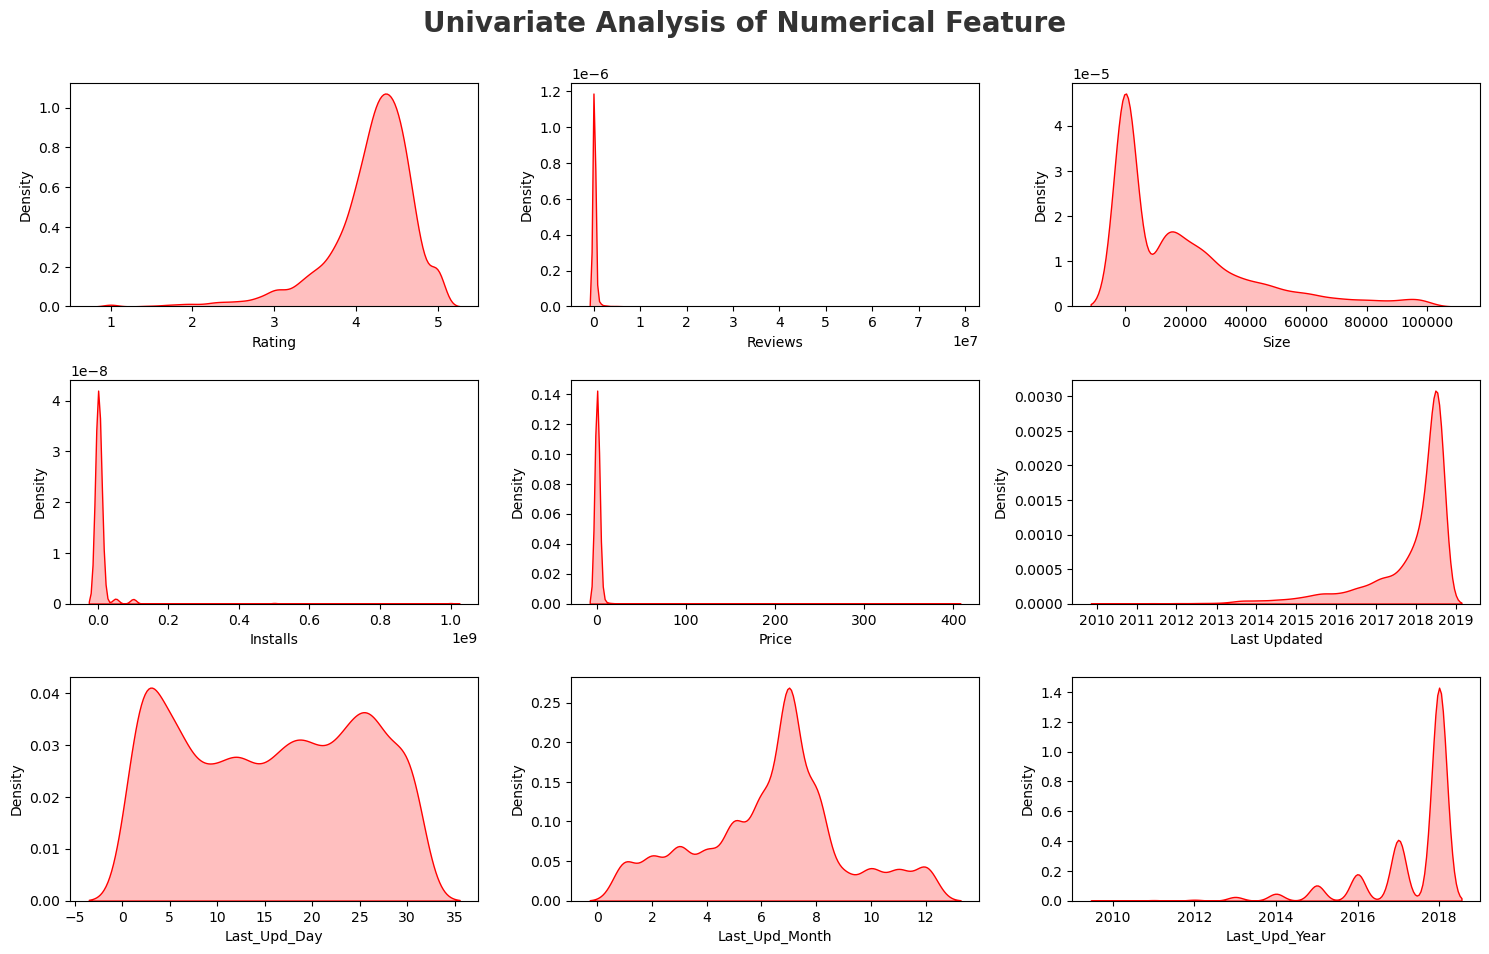

In [43]:
## Praportion of count data on numerical columns 
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=20, fontweight='bold', alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
  plt.xlabel(numeric_features[i])
  plt.tight_layout()

plt.show()


## Obesrvation
Rating and year are left skewed while Reviews, Size, Intalls and Price are right skewed

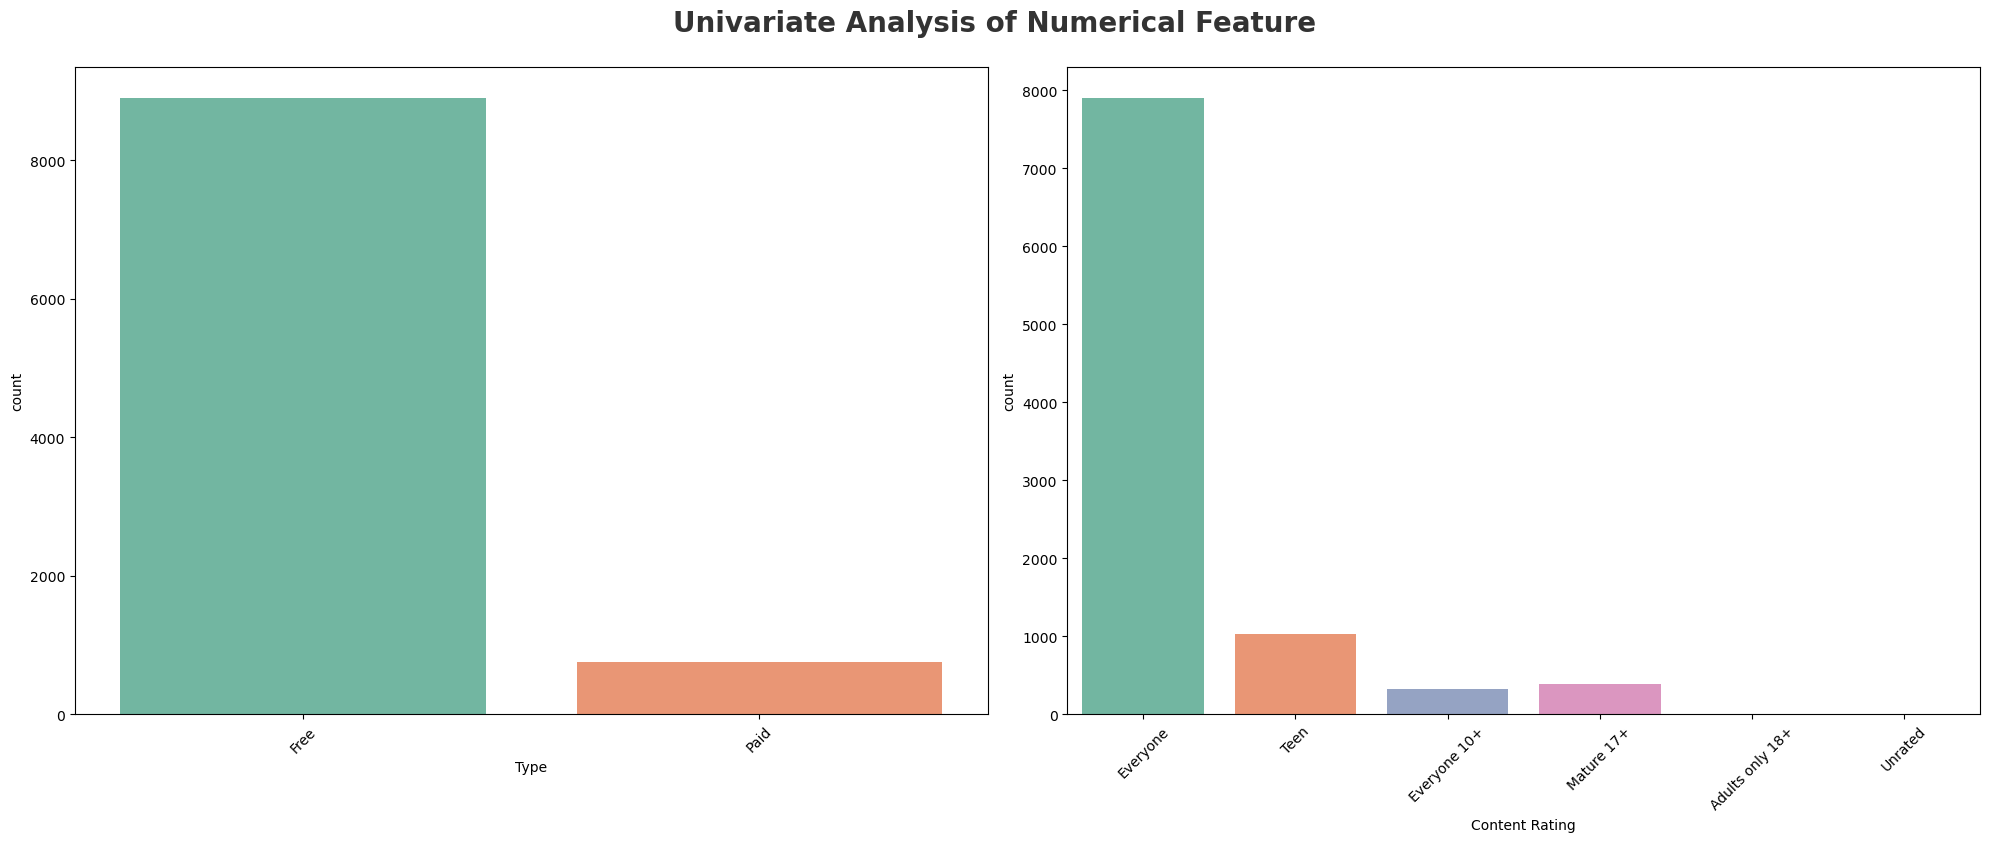

In [44]:
## Praportion of count data on catagorical columns 
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=20, fontweight='bold', alpha=0.8,y=1.)
catagory=['Type', 'Content Rating']
for i in range(0,len(catagory)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df_copy[catagory[i]],palette='Set2')
  plt.xlabel(catagory[i])
  plt.xticks(rotation=45)
  plt.tight_layout()

plt.show()


#### Whiich is the most popular Category in all the apps?

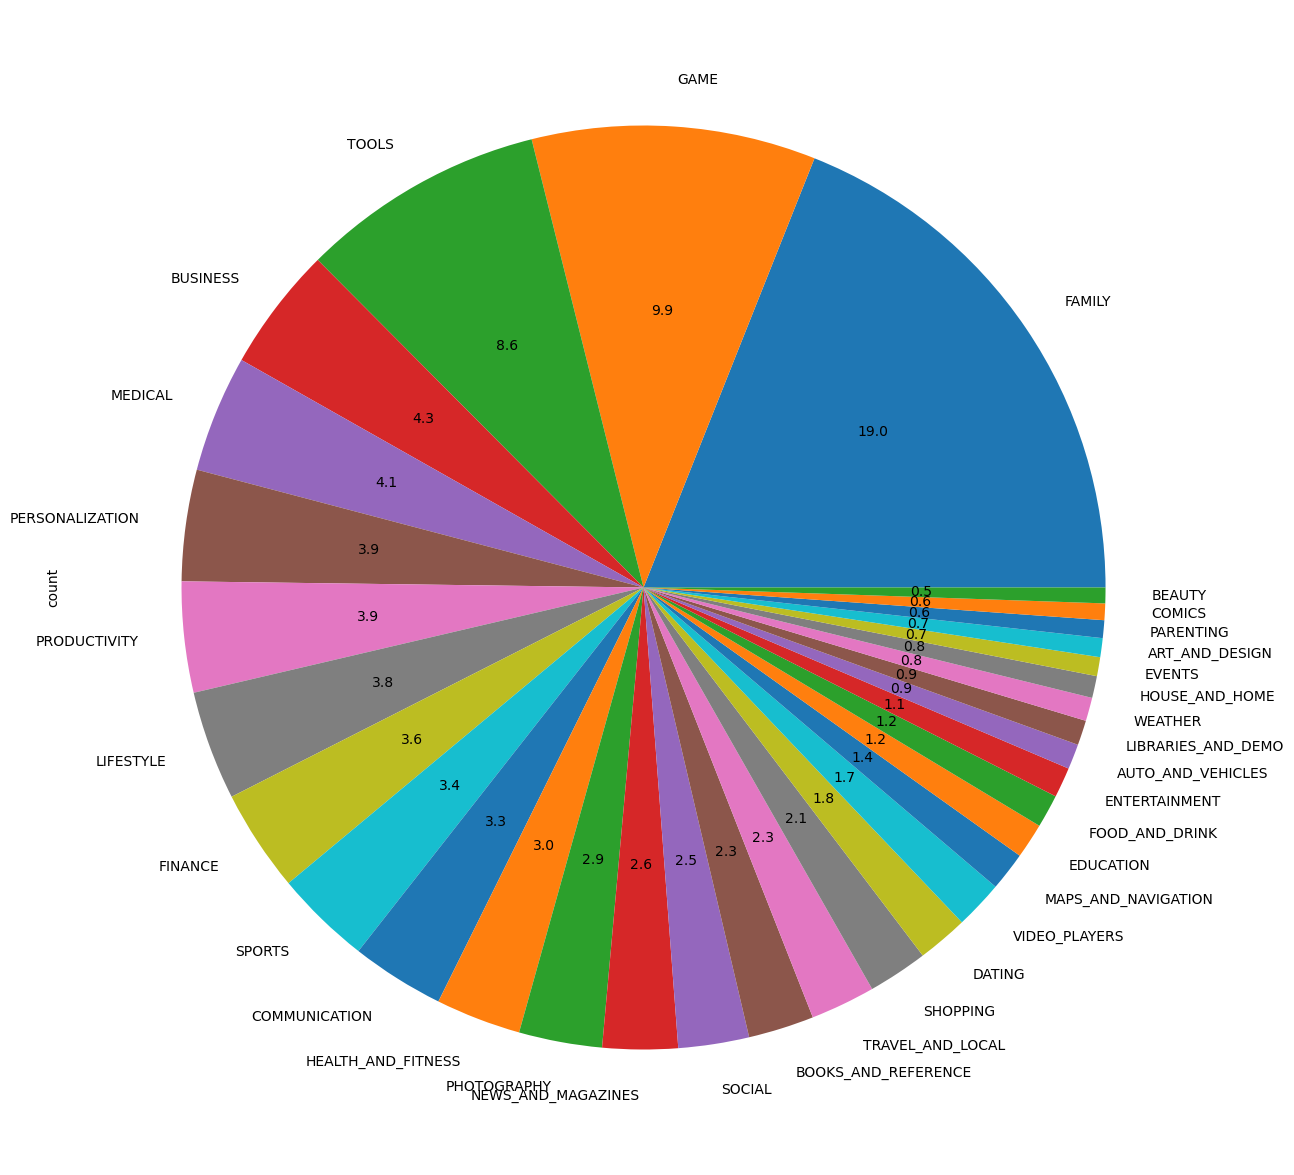

In [45]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,15), autopct='%1.1f')
plt.show()

#### Observations
1. There are more kinds of apps in playstore wich are under of family, games & tools
2. Beauty, comics,art and weather kinds of apps are very less in playstore


In [46]:
#### Top 10 app Categories
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':"Count"},inplace=True)

In [47]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


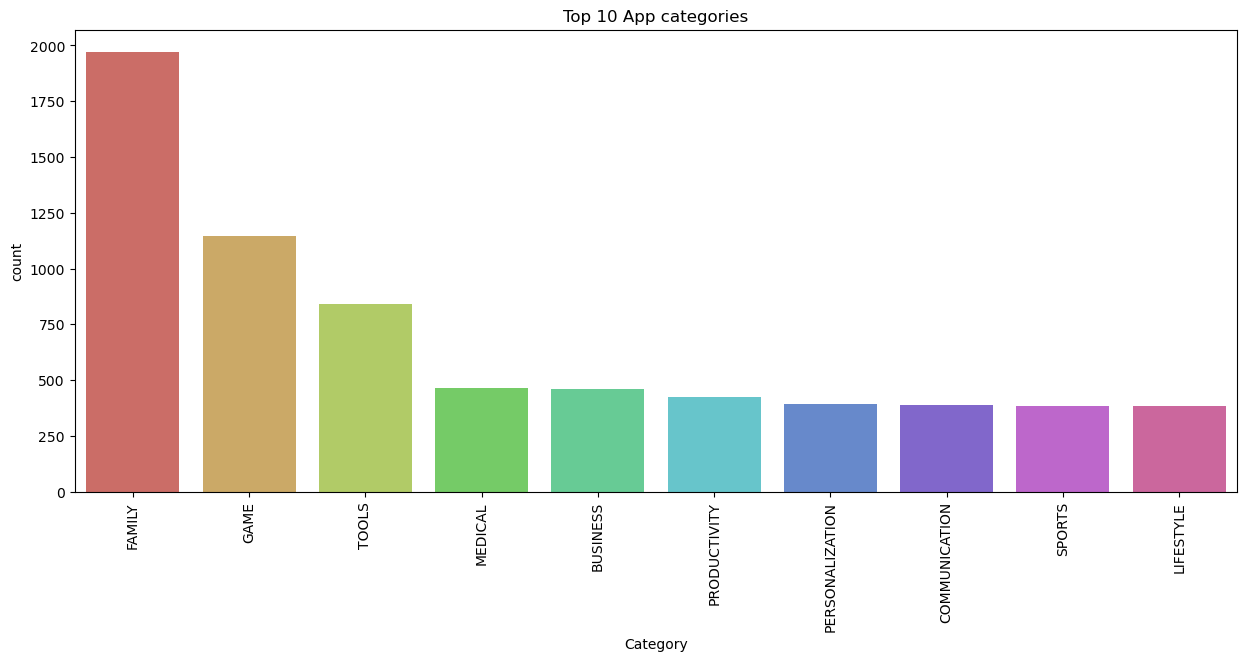

In [48]:
## top 10 Apps
top_10_category = category.nlargest(10, 'count')
plt.figure(figsize=(15,6))
sns.barplot(x=top_10_category.index, y=top_10_category['count'],data=category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

1. Which Catagory has largest number of installations? 
2. what are the top 5 most installed Apps in Each popular Categories ?
3. How many apps are there on Google Play Store which get 5 ratings? 

In [49]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Upd_Day,Last_Upd_Month,Last_Upd_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


#### Which Catagory has largest number of installations?

In [63]:
Installs = pd.DataFrame(df['Installs'].value_counts())
Installs.rename(columns={'Installs':"Count"},inplace=True)

In [64]:
Installs

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [152]:
grouped_df = df_copy.groupby('Category')[['Installs']].sum().reset_index().sort_values(by='Installs',ascending=False)
grouped_df

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


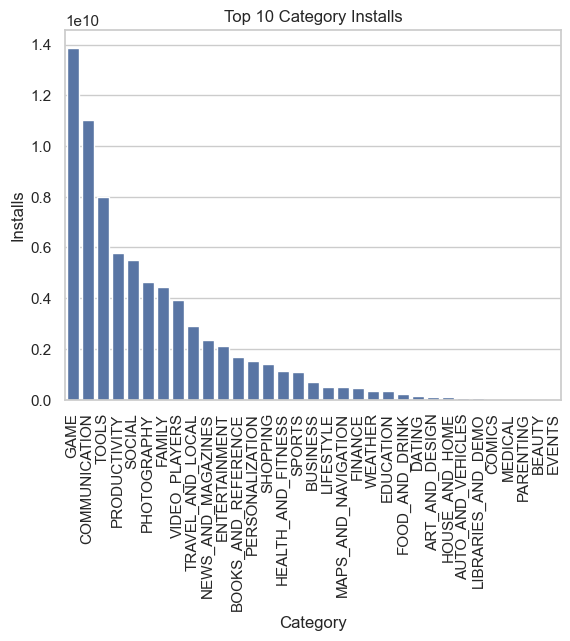

In [153]:
sns.barplot(x='Category',y='Installs',data=grouped_df)
plt.title('Top 10 Category Installs')
plt.xticks(rotation=90)
plt.show()

### Observation
1. Game Category Apps Has Highest Number of operations
2. Communication, Tools and Producivity has more number of installations then any Other Category

### what are the top 5 most installed Apps in Each popular Categories ?

In [151]:
grouped_df1 = df_copy.groupby('Category')[['Installs','App']].sum().reset_index().sort_values(by='Installs',ascending=False)
grouped_df1

,Category,Installs,App
14,GAME,13878924415,ROBLOXSubway SurfersCandy Crush SagaSolitaireB...
6,COMMUNICATION,11038276251,Messenger – Text and Video Chat for FreeWhatsA...
29,TOOLS,8001771915,Moto File ManagerGoogleGoogle TranslateMoto Di...
25,PRODUCTIVITY,5793091369,"Microsoft WordAll-In-One Toolbox: Cleaner, Boo..."
27,SOCIAL,5487867902,"FacebookInstagramFacebook LiteMessages, Text a..."
24,PHOTOGRAPHY,4649147655,TouchNote: Cards & GiftsShutterfly: Free Print...
11,FAMILY,4427941505,Jewels Crush- Match 3 PuzzleColoring & LearnMa...
31,VIDEO_PLAYERS,3926902720,YouTubeAll Video Downloader 2018Video Download...
30,TRAVEL_AND_LOCAL,2894887146,"Expedia Hotels, Flights & Car Rental Travel De..."
21,NEWS_AND_MAGAZINES,2369217760,"Fox News – Breaking News, Live Video & News Al..."


ValueError: Image size of 308640x1276 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1200 with 33 Axes>